In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D

2023-10-28 09:20:09.666584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 09:20:09.702470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 09:20:09.702516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 09:20:09.702534: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 09:20:09.709537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 09:20:09.710293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### a.

Rozmiar pierwszego obrazu: (1050, 1165, 3)
Rozmiar drugiego obrazu: (1073, 1170, 3)


<Figure size 640x480 with 0 Axes>

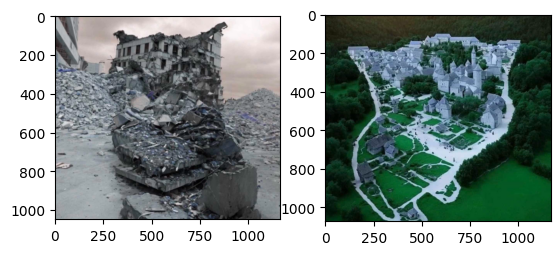

In [5]:
# Wczytanie dwóch przykładowych obrazów
image1 = cv2.imread('images/rubble.jpg')  # Wczytanie pierwszego obrazu
image2 = cv2.imread('images/town.jpg')  # Wczytanie drugiego obrazu

# Sprawdzenie rozmiarów obrazów
print(f'Rozmiar pierwszego obrazu: {image1.shape}')
print(f'Rozmiar drugiego obrazu: {image2.shape}')

plt.figure()
_, axis = plt.subplots(1, 2) 
axis[0].imshow(image1)
axis[1].imshow(image2)
plt.show()

#### Gaussian blur

<Figure size 640x480 with 0 Axes>

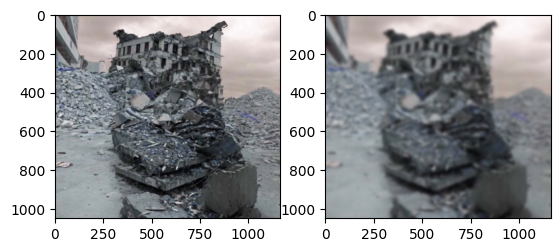

In [33]:
# Zastosowanie filtru rozmycia (Blur) na pierwszym obrazie
blurred_image = cv2.GaussianBlur(image1, (45, 45), 0)

# Wyświetlenie obrazu po zastosowaniu rozmycia
plt.figure()
_, axis = plt.subplots(1, 2) 
axis[0].imshow(image1)
axis[1].imshow(blurred_image)
plt.show()

#### Edge detection

<Figure size 640x480 with 0 Axes>

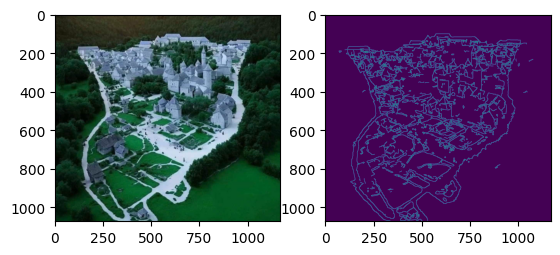

In [34]:
# Detekcja krawędzi (Canny Edge Detection) na drugim obrazie
edges = cv2.Canny(image2, 100, 200)

# Wyświetlenie obrazu z wykrytymi krawędziami
plt.figure()
_, axis = plt.subplots(1, 2) 
axis[0].imshow(image2)
axis[1].imshow(edges)
plt.show()

### b. 

<Figure size 640x480 with 0 Axes>

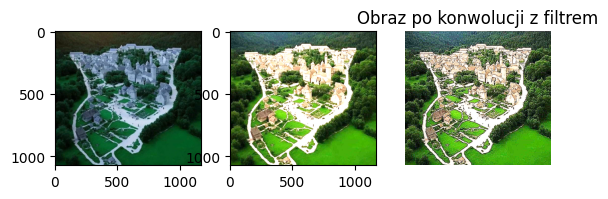

True

In [46]:
# Wczytanie obrazu
image = cv2.imread('images/town.jpg')

# Definicja filtru np. dla wykrywania krawędzi
filter1 = np.array([
    [-1, -1, -1],
    [-1, 10, -1],
    [-1, -1, -1]
])

filter2 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 26, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

# pad_size = filter1.shape[0] // 2  # Długość boku filtra podzielona przez 2
# padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

# Konwolucja z obrazem
result1 = cv2.filter2D(image, -1, filter1)
result2 = cv2.filter2D(image, -1, filter2)

# Wizualizacja obrazu wynikowego
plt.figure()
_, axis = plt.subplots(1, 3) 
axis[0].imshow(image2)
axis[1].imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
axis[2].imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Obraz po konwolucji z filtrem')
plt.show()

# Zapisanie obrazu wynikowego do pliku
cv2.imwrite('images/output/town_filtered.jpg', result1)
cv2.imwrite('images/output/town_filtered2.jpg', result2)

### c.

<Figure size 640x480 with 0 Axes>

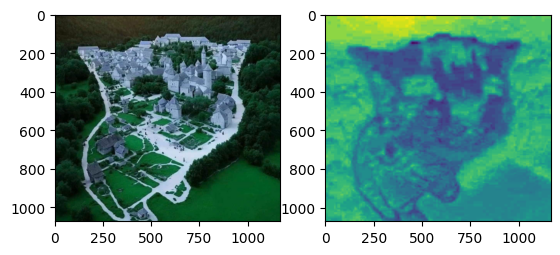

In [56]:
# Funkcja konwolucji dla sieci neuronowych
def convolution(image, filter, stride):
    image_height, image_width, color_channels = image.shape
    filter_size = filter.shape[0]
    stride = stride

    # Obliczanie rozmiaru obrazu wynikowego
    output_height = int((image_height - filter_size) / stride) + 1
    output_width = int((image_width - filter_size) / stride) + 1

    # Ustalanie zero padding automatycznie
    pad_height = (output_height - 1) * stride + filter_size - image_height
    pad_width = (output_width - 1) * stride + filter_size - image_width

    # Zero padding, jeśli wymagane
    if pad_height > 0 or pad_width > 0:
        pad_top = pad_height // 2
        pad_bottom = pad_height - pad_top
        pad_left = pad_width // 2
        pad_right = pad_width - pad_left
        image = np.pad(image, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=0)

    # Nowy rozmiar obrazu z uwzględnieniem zero padding
    image_height, image_width, color_channels = image.shape

    # Inicjalizacja obrazu wynikowego
    output = np.zeros((output_height, output_width))

    # Wykonanie konwolucji
    for i in range(0, image_height - filter_size + 1, stride):
        for j in range(0, image_width - filter_size + 1, stride):
            output[i // stride, j // stride] = np.sum(image[i:i+filter_size, j:j+filter_size] * filter)

    return output

# Przykładowe obrazy (wymiary 6x6)
image = cv2.imread("images/town.jpg")

# Przykładowy filtr (maska 3x3)
filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Wyświetlenie obrazu wynikowego
plt.figure()
_, axis = plt.subplots(1, 2) 
axis[0].imshow(image)
axis[1].imshow(convolution(image, filter, stride=1))
plt.show()
